# Matching results from analytical solutions

In [Schuss et al.](https://www.pnas.org/content/104/41/16098) they show that for D = 400, a = 0.1 and v = 1, the mean escape time is 0.00625 s.

We can use this model to test if that is a resonable result

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from PyEscape.escape_plan import escape
from PyEscape.escape_points import fibonacci_spheres
from PyEscape.escape_utility import sphere_vol_to_r, calculate_delta
from tqdm import tqdm

In [2]:
D = 400
v = 1
a = 0.1
n_pores = 1
pores = fibonacci_spheres(n_pores, v)

N = 2
results = []
for i in tqdm(range(N)):
    results.append(escape(D, v, a, pores, dt=1e-8))

100%|██████████| 2/2 [01:13<00:00, 36.56s/it]


In [3]:
escape(D,v,a,pores, dt=1e-7, with_exit_loc=True)

(0.0043292999999999995, array([0.6002501 , 0.02012247, 0.00146075]))

We can see from the above figure, that for our parameters we can accurately, and quickly arrive at a viable solution to Schuss et al. 

# Visualising escape paths

In [9]:
values

(0.011263299999999999,
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]))

In [8]:
from PyEscape.escape_drawing import draw_sphere
from PyEscape.escape_points import random_points_on_ellipsoid


np.random.seed(1)

ABC=np.array([0.62,.62,.62])
pores = random_points_on_ellipsoid(ABC)

values = escape(D, v,a, pores, with_path=True, dt=1e-7, shape='ellipsoid', ABC=ABC)
eo=1000

x = np.zeros(len(values[::eo,0])+1)
y = np.zeros(len(values[::eo,0])+1)
z = np.zeros(len(values[::eo,0])+1)

x[:-1] = values[::eo,0]
y[:-1] = values[::eo,1]
z[:-1] = values[::eo,2]

x[-1] = values[-1,0]
y[-1] = values[-1,1]
z[-1] = values[-1,2]
len(x)

TypeError: tuple indices must be integers or slices, not tuple

In [6]:
import imageio
import os

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')


ax.set_box_aspect([1,1,1]) 
#ax.axis('off')


#ax.legend()

filenames = []
for i,_ in enumerate(x):
    # plot the line chart
    ax.clear()
    draw_sphere(v, ax)
    ax.plot3D(x[:i],y[:i],z[:i], c='b')   
    for idx, p in enumerate(pores):
        ax.scatter(p[0], p[1], p[2], c='r', alpha=0.8, s=100, label='Escape Pore' if idx == 0 else "" )
    
    # create file name and append it to a list
    filename = f'{i}.png'
    filenames.append(filename)
    
    # save frame
    fig.savefig(filename)


    
# build gif
with imageio.get_writer('mygif.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
# Remove files
for filename in set(filenames):
    os.remove(filename)

<IPython.core.display.Javascript object>

NameError: name 'x' is not defined

In [12]:
from PyEscape.escape_drawing import draw_sphere
from PyEscape.escape_points import fibonacci_spheres

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')


ax.set_box_aspect([1,1,1]) 
np.random.seed(1)
draw_sphere(1, ax)
ABC=np.array([0.62,.62,.62])
pores = fibonacci_spheres(1000)
px = pores[:,0]
py = pores[:,1]
pz = pores[:,2]

ax.scatter(px, py,pz, c='b', s=1)
for idx, p in enumerate(pores):
    ax.scatter(p[0], p[1], p[2], c='b', alpha=0.8, s=10, label='Escape Pore' if idx == 0 else "" )
ax.axis('off')
fig.show()


<IPython.core.display.Javascript object>

In [ ]:
len(filenames)

5

In [ ]:
len(x)

28806

<IPython.core.display.Javascript object>


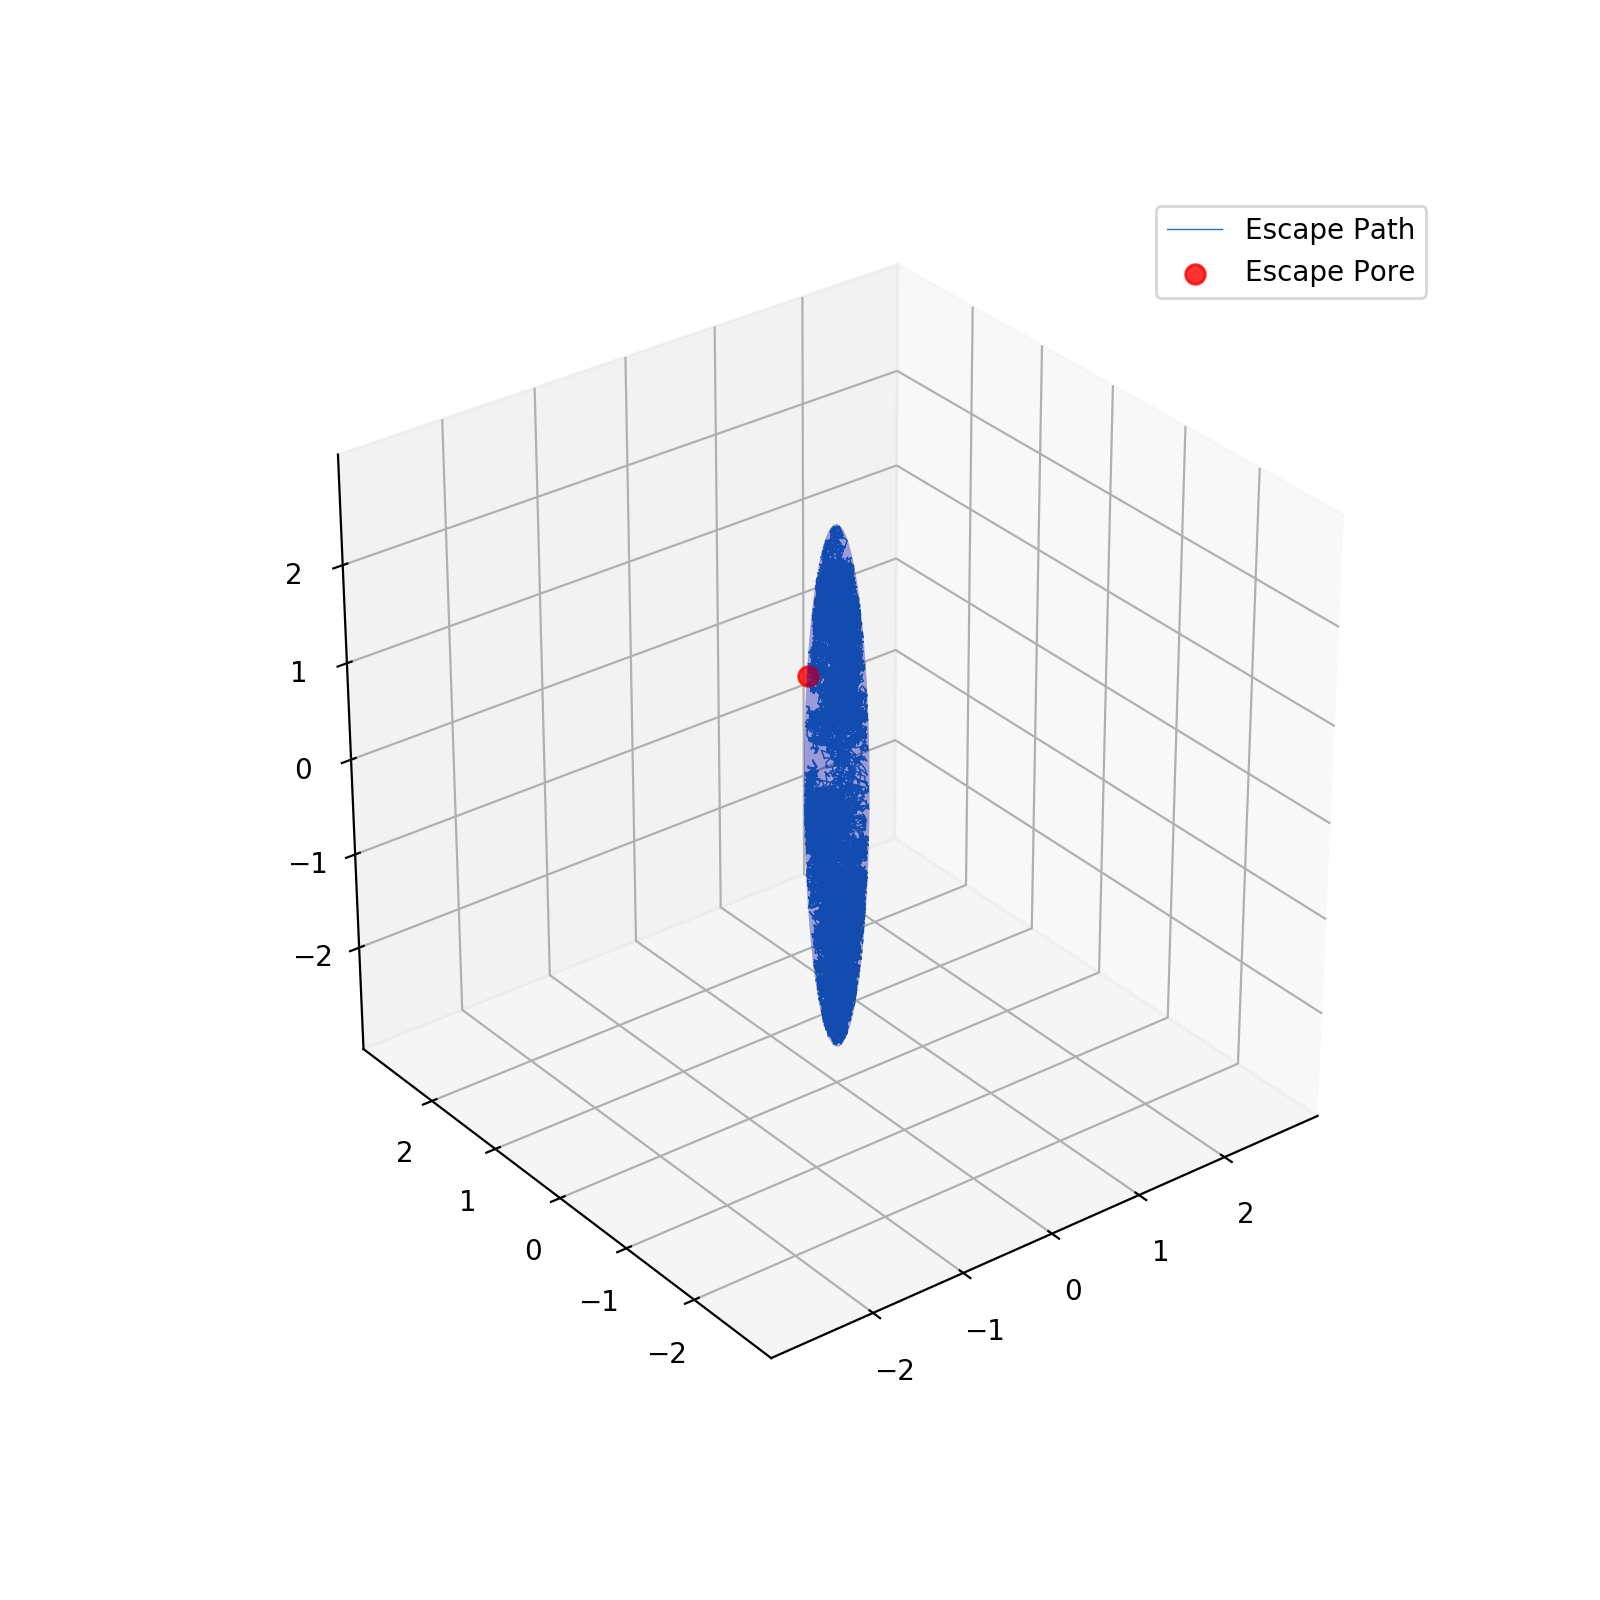

In [ ]:
from PyEscape.escape_drawing import draw_sphere
from PyEscape.escape_points import random_points_on_ellipsoid

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

np.random.seed(1)

ABC=np.array([0.26467467, 0.33265048, 2.71150778])
pores = random_points_on_ellipsoid(ABC)
phi = np.linspace(0,2*np.pi, 256).reshape(256, 1) # the angle of the projection in the xy-plane
theta = np.linspace(0, np.pi, 256).reshape(-1, 256) # the angle from the polar axis, ie the polar angle
radius = 4

# Transformation formulae for a spherical coordinate system.
X = ABC[0]*np.sin(theta)*np.cos(phi)
Y = ABC[1]*np.sin(theta)*np.sin(phi)
Z = ABC[2]*np.cos(theta)

values = escape(D, v,a, pores, with_path=True, dt=1e-7, shape='ellipsoid', ABC=ABC)
eo=10
ax.plot(np.append(values[:,0][::eo],values[:,0][-1] ) ,
        np.append(values[:,1][::eo], values[:,1][-1]),
        np.append(values[:,2][::eo],values[:,2][-1]),
        alpha=1, linewidth=0.5, label='Escape Path')



max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max()
Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(X.max()+X.min())
Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(Y.max()+Y.min())
Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(Z.max()+Z.min())
# Comment or uncomment following both lines to test the fake bounding box:
for xb, yb, zb in zip(Xb, Yb, Zb):
    ax.plot([xb], [yb], [zb], 'w')

#draw_sphere(v, ax)
ax.plot_surface(X, Y, Z, color='b', alpha=0.2)

for idx, p in enumerate(pores):
    ax.scatter(p[0], p[1], p[2], c='r', alpha=0.8, s=50, label='Escape Pore' if idx == 0 else "" )
ax.legend()


# Making clusters:

In [ ]:
def vol_ellipsoid(a,b,c): return 4/3*np.pi*a*b*c
vol=1
ABC=np.array([1.,1., 9.93103448])
volN = vol_ellipsoid(*ABC)
cbrt_diff = vol/np.cbrt(volN)
np.array(ABC * cbrt_diff)

array([0.28860618, 0.28860618, 2.86615797])

In [ ]:
from PyEscape.escape_points import make_clusters


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
clusters = make_clusters(50, nclusters=4)
for c in clusters:
    x,y,z = c
    ax.scatter(x,y,z, s=0.1)

draw_sphere(1, ax)

<IPython.core.display.Javascript object>

In [ ]:
indices

NameError: name 'indices' is not defined

In [ ]:
npoints = 2
vec = np.random.randn(3, npoints)
vec /= np.linalg.norm(vec, axis=0)
print(vec)